# Clasificador de imágenes
Seleccione un número de imagen (0-499) el algoritmo la clasificará. \
Al final de la notebook se visualizan las imágenes del número 0 al 199.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from run import class_names, X_train, X_test, y_train, y_test
from src.knn import knn_get_class
from src.pca import pca_cache

[3]
Clase esperada: Dress
Clase obtenida: Dress


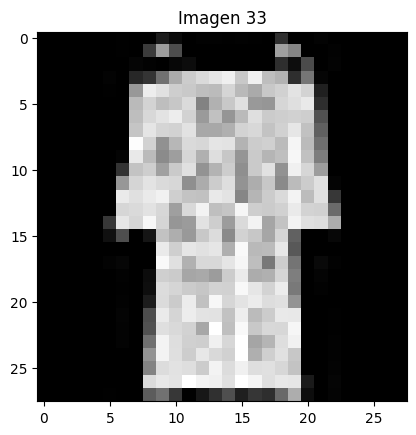

In [21]:
#Valores óptimos de k y p computados con run.py
k = 1
p = 25

#user input
n = -1
while(n < 0 or n > 499): 
    n = int(input("Número de imagen"))

#Imagen seleccionada
plt.title("Imagen " + str(n))
plt.imshow(X_test[n].reshape(28,28), cmap=plt.cm.gray, vmax=1)

#Predicción de la clase de ropa de la imagen
_, V = pca_cache(X_train, X_train.shape[1], "all")

X_train_centrada = X_train - X_train.mean(axis=1, keepdims=True)
x_test_centrada = X_test[n] - X_test[n].mean()
X_train_hat = X_train_centrada @ V[:,0:p]
x_test_hat = x_test_centrada @ V[:,0:p]

class_prediction = knn_get_class(x_test_hat, X_train_hat, y_train, k)

#Resultados
print("Clase esperada: " + class_names[y_test[n]])
print("Clase obtenida: " + class_names[class_prediction])

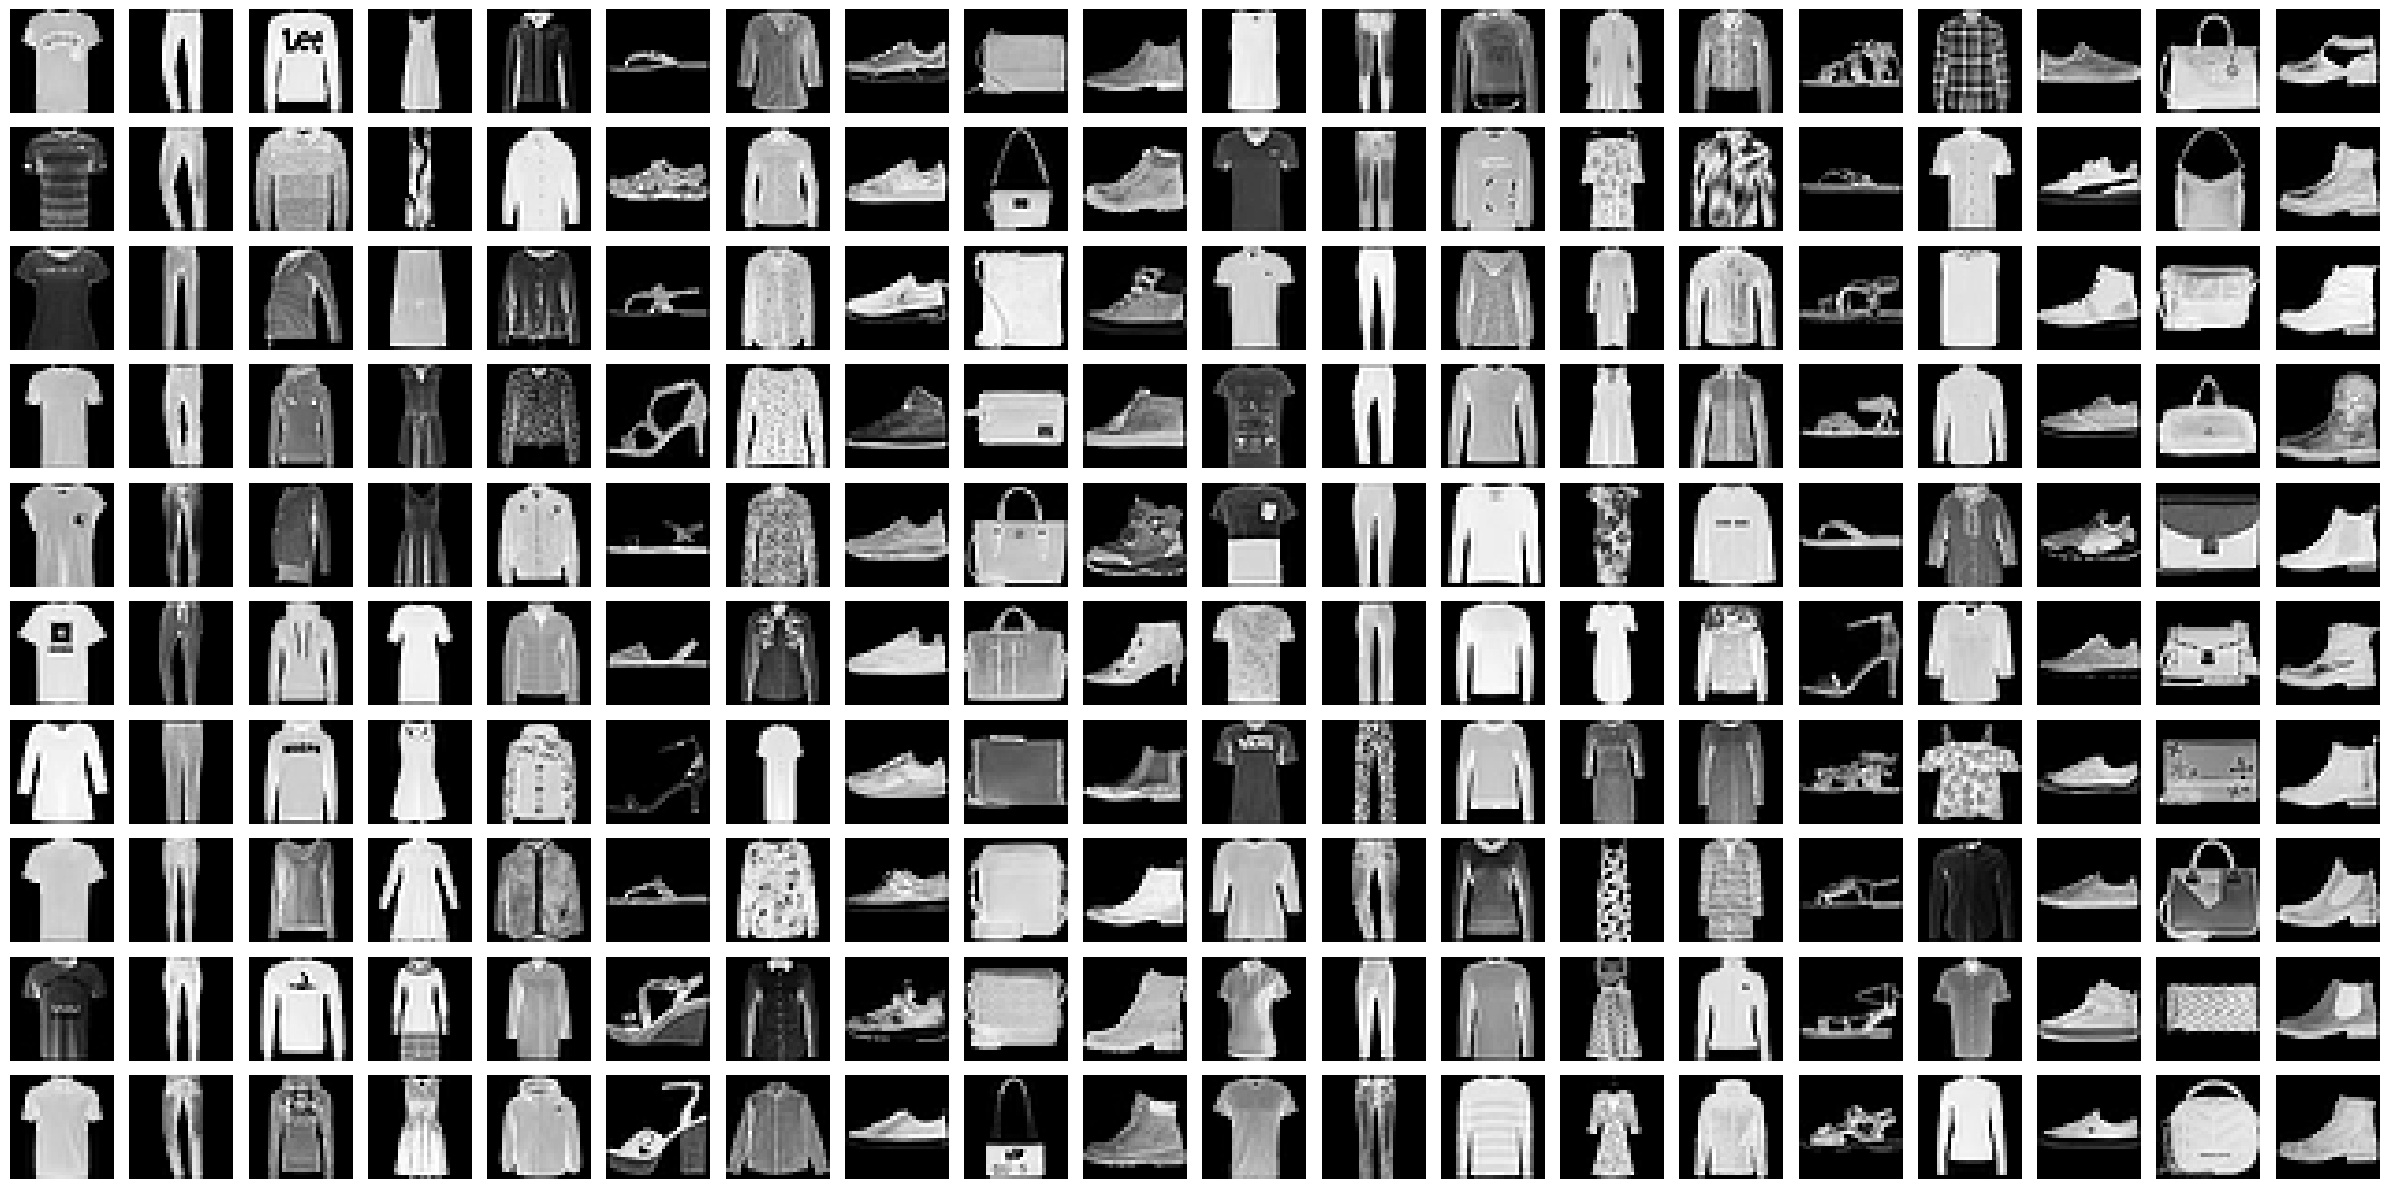

In [20]:
#Imagenes número 1-200
f, axs = plt.subplots(10,20, figsize=(24,12))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.gray, vmax=1)
    ax.axis('off')
plt.tight_layout()